In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/dementia-prediction-dataset/dementia_dataset.csv


In [2]:
# Reading the CSV file into a DataFrame
df1 = pd.read_csv('/kaggle/input/dementia-prediction-dataset/dementia_dataset.csv')

# Printing the shape of the DataFrame
print(df1.shape)

(373, 15)


Features in Dementia database
* SubjectID: Unique Identifier for individual subjects
* MRI ID: Unique identifier for each test. One subject may have more than one MRI ID
* Group: Class label
* Visit: Number of times a subject has visited for test
* MRDelay: Delay of visit by a subject since last visit (Number of days)
* CDR Clinical dementia rating
* Gender: Male or Female
* SES: Socio Economic Status assessed by hollingshead index of social position
* MMSE: Mini Mental State Examination Value
* eTIV: Estimated total intracranial volume
* nWBV: Normalized whole-brain volume, expressed as a percent of all voxels (“constant” for any value of estimated total intracranial volume)
* ASF: Atlas Scale Factor; volume scaling factor for brain size (“constant” for any value of estimated total intracranial volume)

In [3]:
df1.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
# Checking unique values in column 'Group'
df1['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

The first two groups of subjects are 'Demented' and 'Non-demented' in which the patient has the Dementia or not, respectively. Patients that develop the Dementia during the tests are grouped as 'Converted', for making this model more generalized towards classification of the disease, I changed the subject's group from 'Converted' to 'Nondemented' for all the previous visits and for the final visit to 'Demented'.

In [5]:
# Filtering rows in df1 where the 'Group' column is equal to 'Converted' and assigning them to df2
df2 = df1.loc[df1['Group'] == 'Converted']

# Dropping the rows from df1 that have been assigned to df2 using the corresponding index values
df1 = df1.drop(df2.index)

df2.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362


In [6]:
# Creating a new column 'Last_Visit' to identify the last visit for each patient
df2['Last_Visit'] = df2.groupby('Subject ID')['Visit'].transform('max')

# Updating the 'Group' column based on 'Visit' and 'Last_Visit' conditions
df2.loc[df2['Visit'] < df2['Last_Visit'], 'Group'] = 'Nondemented'
df2.loc[df2['Visit'] == df2['Last_Visit'], 'Group'] = 'Demented'

# Dropping the 'Last_Visit' column
df2.drop('Last_Visit', axis=1, inplace=True)

# Displaying the updated DataFrame
df2.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Nondemented,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Nondemented,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Demented,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Nondemented,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Nondemented,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093


In [7]:
# Combining the DataFrames df1 and df2
frames = [df1, df2]
df = pd.concat(frames)

df['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

In [8]:
# Renaming the 'M/F' column to 'Gender' in the DataFrame
df.rename(columns={'M/F': 'Gender'}, inplace=True)

# Dropping unnecessary columns from the DataFrame
df.drop(columns=['Subject ID', 'MRI ID', 'Hand', 'Visit', 'MR Delay'], inplace=True)

In [9]:
# Checking for missing values in the DataFrame
df.isna().sum()

Group      0
Gender     0
Age        0
EDUC       0
SES       19
MMSE       2
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [10]:
# Imputing missing values in the 'SES' column with the mode
df.SES.fillna(df.SES.mode()[0], inplace=True)

# Imputing missing values in the 'MMSE' column with the mean
df.MMSE.fillna(df.MMSE.mean(), inplace=True)

df.isna().sum()

Group     0
Gender    0
Age       0
EDUC      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

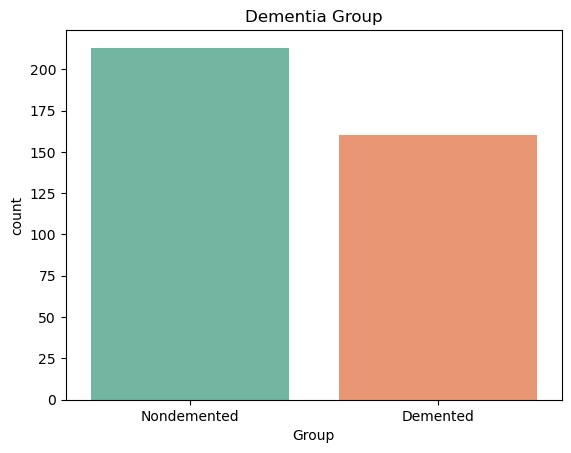

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a count plot with 'Group' on the x-axis
sns.countplot(data=df, x='Group', palette='Set2').set(title = 'Dementia Group');

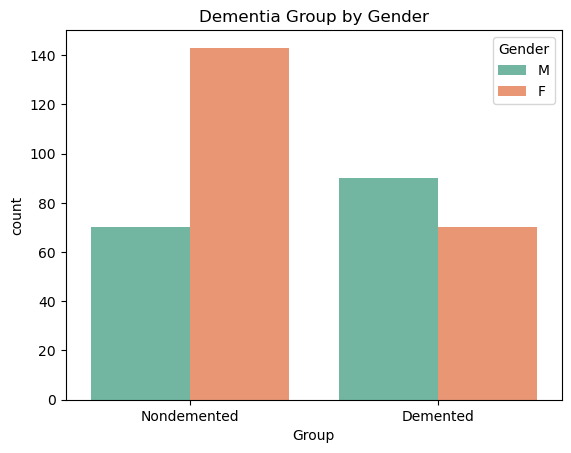

In [12]:
# Visualizing the distribution of 'Group' by 'Gender' using a count plot
sns.countplot(data=df, x='Group', palette='Set2', hue='Gender').set(title = 'Dementia Group by Gender');

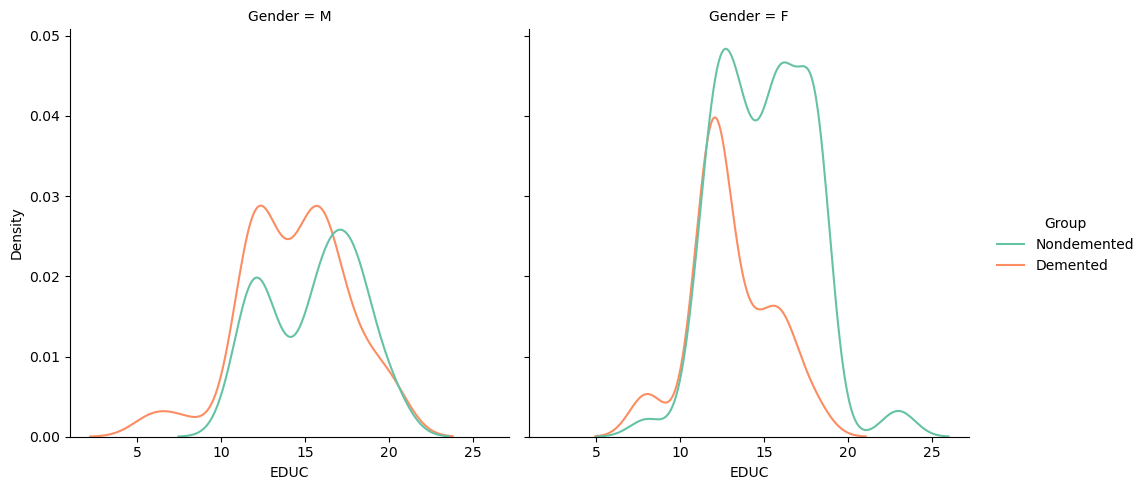

In [13]:
# Visualizing the distribution of Education for each 'Gender' and 'Group'
sns.displot(data=df, x='EDUC', col='Gender', palette='Set2', hue='Group', kind='kde');

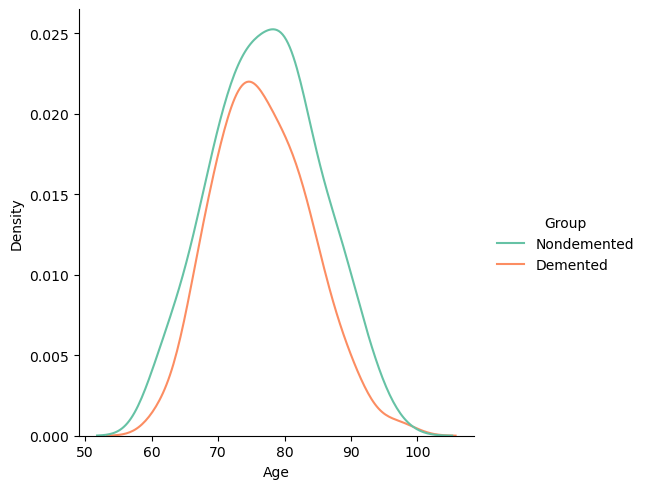

In [14]:
# Visualizing the distribution of 'Age' for each 'Group'
sns.displot(data=df, x='Age', hue='Group', kind="kde", palette='Set2');

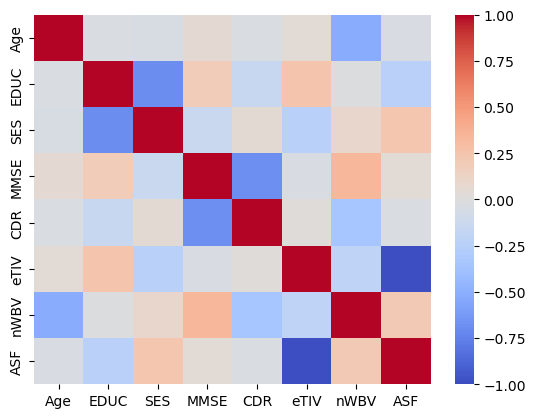

In [15]:
# Visualizing the correlation matrix of numeric columns using a heatmap
sns.heatmap(df.corr(numeric_only=True), vmin=-1, cmap='coolwarm');

In [16]:
# Asf and Etiv have a strong negative correlation, eliminating one of the two variables to reduce noise in the data
df.drop(columns=['ASF'], inplace=True)

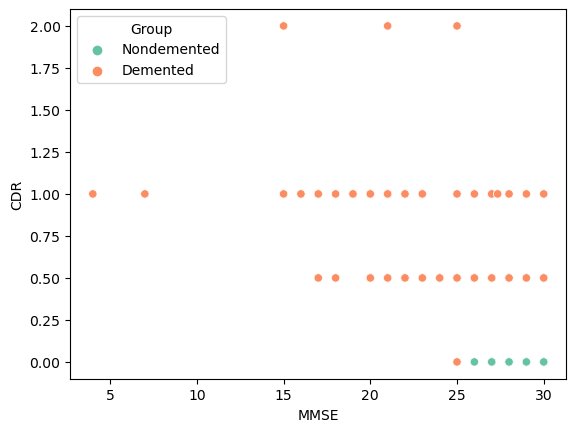

In [17]:
# Visualizing the relationship between 'MMSE' and 'CDR' variables with respect to 'Group'
sns.scatterplot(data=df, x='MMSE', y='CDR', palette='Set2', hue='Group');

In [18]:
# Importing the necessary library for label encoding
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder class
le = LabelEncoder()

# Encoding the 'Gender' column in the DataFrame
df.Gender = le.fit_transform(df.Gender.values)

# Printing the mapping of encoded values to original classes for 'Gender'
print(f'Sex:\n0 : {le.classes_[0]}\n1 : {le.classes_[1]}\n\n')

df.Group = le.fit_transform(df.Group.values)
print(f'Group:\n0 : {le.classes_[0]}\n1 : {le.classes_[1]}')

Sex:
0 : F
1 : M


Group:
0 : Demented
1 : Nondemented


In [19]:
# Importing the necessary library for train-test split
from sklearn.model_selection import train_test_split

# Assigning the 'Group' column as the target variable
y = df.Group

# Assigning the remaining columns as the features
X = df.drop(['Group'], axis=1)

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Importing the necessary library for Random Forest classification
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting the target variable for the test data
y_hat = model.predict(X_test)

In [21]:
# Importing the necessary libraries for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat, average='binary'))
print('Recall:', recall_score(y_test, y_hat, average='binary'))
print('F1 Score:', f1_score(y_test, y_hat, average='binary') )

Accuracy Score: 0.9733333333333334
Precision: 1.0
Recall: 0.9512195121951219
F1 Score: 0.975
